In [19]:
import matplotlib.pyplot as plt


In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout


In [47]:
(train_images, train_labels), (test_images, test_labels) =cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [48]:
train_images.shape
test_images.shape

(10000, 32, 32, 3)

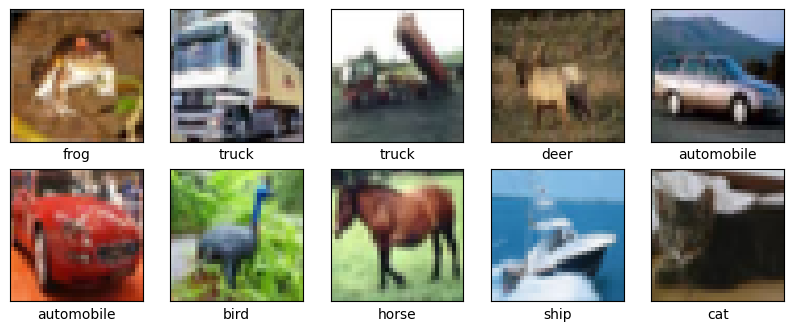

In [51]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [53]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 1
h = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.3415 - loss: 1.7634 - val_accuracy: 0.5419 - val_loss: 1.2770


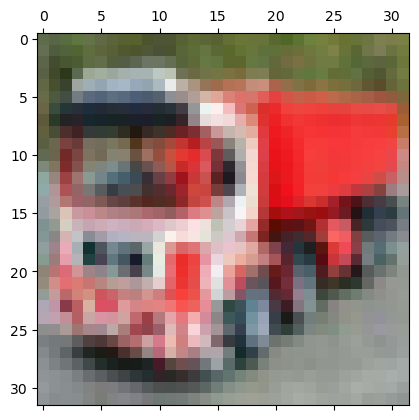

In [59]:
 
 plt.matshow(test_images[666])

In [61]:
predictions = model.predict(test_images, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [63]:
np.argmax(predictions[666])

9

In [67]:
import numpy as np
import seaborn as sns

In [69]:
y_predicted_labels = [np.argmax(i) for i in predictions]
y_predicted_labels[:5]

[6, 1, 1, 8, 6]

<Axes: >

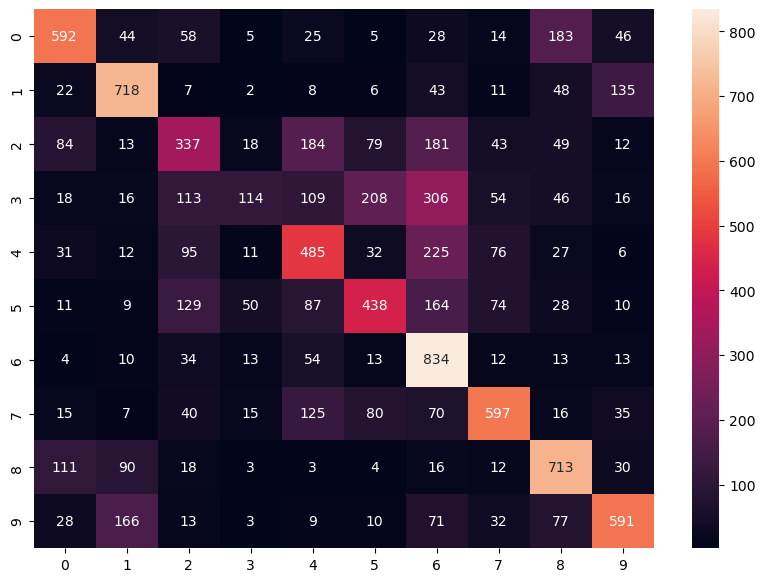

In [71]:
 cm = tf.math.confusion_matrix(test_labels, y_predicted_labels)
 plt.figure(figsize = (10, 7))
 sns.heatmap(cm, annot=True, fmt='d')
 #this heatmap shows that our model suffered most in the classification of classes 2 and 3 i.e birds and cat

In [73]:

 model_eval = model.evaluate(test_images, test_labels)
 print("Accuracy of model is:", model_eval[1], "%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5454 - loss: 1.2698
Accuracy of model is: 0.5418999791145325 %
